In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Define ticker and range
ticker = "AAPL"

#Historical data
data = yf.download(ticker, period = "12mo", interval = "1d")
df = pd.DataFrame(data)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-09,155.470001,157.820007,154.750000,157.369995,156.441925,68028800
2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466187,104956000
2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394058,87965400
2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471405,90481100


##### Same you can
##### start_date = "2022-01-01"
##### end_date = "2023-01-01"
##### "data = yf.download(ticker, start_date, end_date)"

In [9]:
#Calculate the moving avergae 

df['SMA50'] = df['Close'].rolling(window = 50).mean()
df['SMA200'] = df['Close'].rolling(window = 200).mean()

df[['SMA200','SMA50']] = df[['SMA200','SMA50']].fillna(0)

##### Note : NaN might insuffcient historical data or missing data points like holidays & weekends

In [10]:
# Create a 'Signal' column based on the crossover

df['Signal'] = 0 

df.loc[df['SMA50'] > df['SMA200'], 'Signal'] = 1 #Would be our buy singnal
df.loc[df['SMA50'] < df['SMA200'], 'Signal'] = -1 #Would be our sell signal

df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,Signal
Date,,,,,,,,,
2022-09-09,155.470001,157.820007,154.750000,157.369995,156.441925,68028800,0.0,0.0,0
2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466187,104956000,0.0,0.0,0
2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600,0.0,0.0,0
2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394058,87965400,0.0,0.0,0
2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471405,90481100,0.0,0.0,0


In [5]:
#Calculate daily Return

df['Return'] = df['Close'].pct_change()

#Calculate Strategy returns
df['Strategy_Return'] = df['Signal'].shift(1) * df['Return']

df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,Signal,Return,Strategy_Return
Date,,,,,,,,,,,
2021-09-09,155.490005,156.110001,153.949997,154.070007,152.307938,57305700,0.0,0.0,0,NaN,NaN
2021-09-10,155.000000,155.479996,148.699997,148.970001,147.266251,140893200,0.0,0.0,0,-0.033102,-0.0
2021-09-13,150.630005,151.419998,148.750000,149.550003,147.839645,102404300,0.0,0.0,0,0.003893,0.0
2021-09-14,150.350006,151.070007,146.910004,148.119995,146.425949,109296300,0.0,0.0,0,-0.009562,-0.0
2021-09-15,148.559998,149.440002,146.369995,149.029999,147.325546,83281300,0.0,0.0,0,0.006144,0.0


##### shifts the 'Signal' column by one day to align it with the asset's returns. This is necessary because we would have entered the trade based on yesterday's signal and experienced today's returns.

##### Note : The multiplication of data['Signal'].shift(1) and data['Returns'] computes the strategy returns. If we had a "Buy" signal (1), it multiplies the previous day's returns, and if we had a "Sell" signal (-1), it multiplies by the negative returns.

In [6]:
#Calculate performace matrics

total_returns  = (df['Strategy_Return'] + 1).cumprod()[-1]
anual_return = ((total_returns ** (252/len(data))) -1 )
ratio = df['Strategy_Return'].mean() / df['Strategy_Return'].std()*(252 ** 0.5)

print(f"Total Returns: {total_returns:.2f}")
print(f"Annualized Returns: {anual_return:.2f}")
print(f"Sharpe Ratio: {ratio:.2f}")

Total Returns: 0.73
Annualized Returns: -0.15
Sharpe Ratio: -0.40


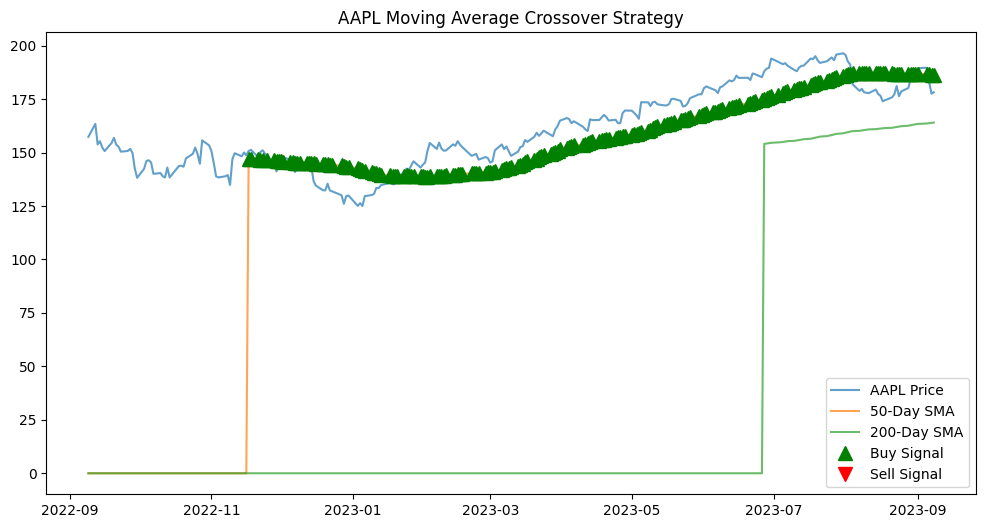

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{ticker} Price', alpha=0.7)
plt.plot(df['SMA50'], label='50-Day SMA', alpha=0.7)
plt.plot(df['SMA200'], label='200-Day SMA', alpha=0.7)

# Plot buy/sell signals
plt.plot(df[df['Signal'] == 1].index, df['SMA50'][df['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['SMA50'][df['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{ticker} Moving Average Crossover Strategy')
plt.legend()
plt.show()
